In [1]:
import glob
import matplotlib as mpl
import re

import pandas as pd

In [2]:
import sys
print(sys.version)

3.5.1 (v3.5.1:37a07cee5969, Dec  5 2015, 21:12:44) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]


In [3]:
%matplotlib inline

In [4]:
!ls ../../unused_reads/

__pycache__               blast_unmapped.py         old                       unmapped-final
analysis.py               downsample_differently.py plots                     unused_reads.py
blast_multiply_mapped.py  multiply_mapped-final     test_run_pipeline.py      unused_reads.pyc


['../../unused_reads/unmapped-final/blast_results/74_LOW10_10000-blasted.tsv', '../../unused_reads/unmapped-final/blast_results/112_LOW13_10000-blasted.tsv', '../../unused_reads/unmapped-final/blast_results/19_HOW5_10000-blasted.tsv', '../../unused_reads/unmapped-final/blast_results/112_LOW13_1000-blasted.tsv', '../../unused_reads/unmapped-final/blast_results/70_HOW9_10000-blasted.tsv', '../../unused_reads/unmapped-final/blast_results/82_HOW10_10000-blasted.tsv', '../../unused_reads/unmapped-final/blast_results/57_HOW8_10000-blasted.tsv', '../../unused_reads/unmapped-final/blast_results/32_HOW6_10000-blasted.tsv']
available downsampling granularities: [10000]
['../../unused_reads/multiply_mapped-final/blast_results/57_HOW8_100-blasted.tsv', '../../unused_reads/multiply_mapped-final/blast_results/19_HOW5_100-blasted.tsv', '../../unused_reads/multiply_mapped-final/blast_results/32_HOW6_100-blasted.tsv', '../../unused_reads/multiply_mapped-final/blast_results/74_LOW10_100-blasted.tsv', '.

/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


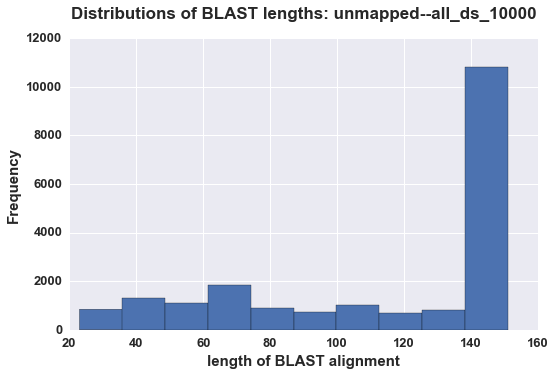

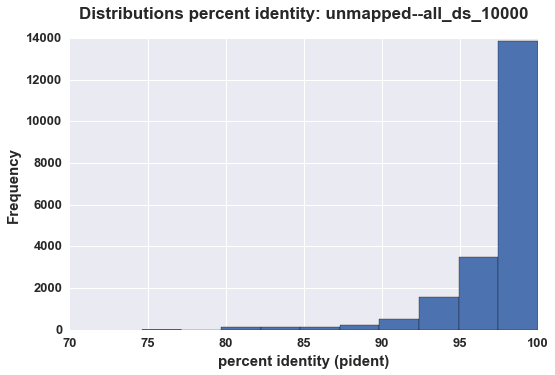

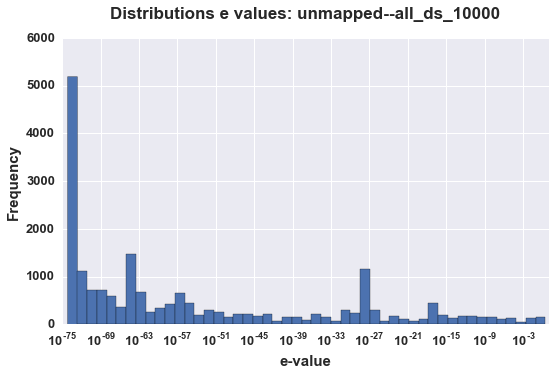

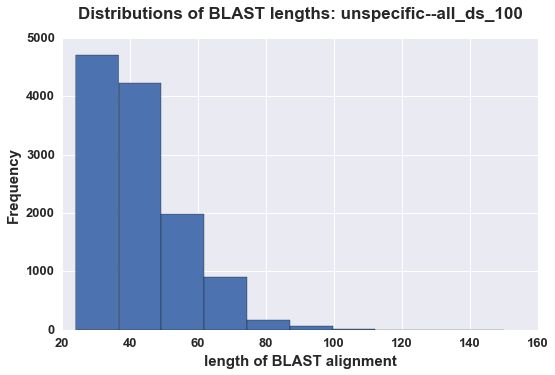

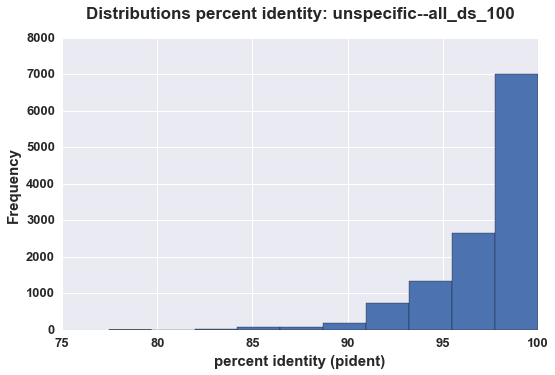

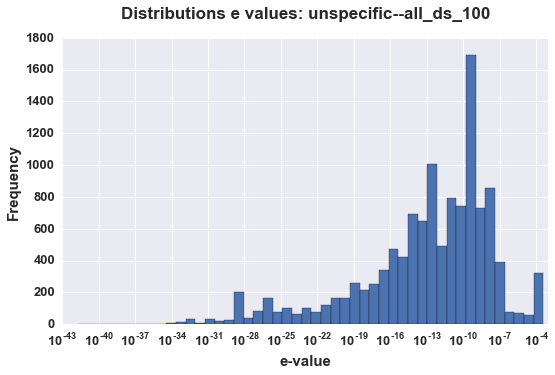

In [5]:
# Import .py file from a different path:
# first add the path to that dir to my path. 
sys.path.append("../../unused_reads/")
import analysis

## Unmapped reads:

In [6]:
analysis.unmapped.head(2)

,stitle,qseqid,sseqid,pident,length,evalue,bitscore,mismatch,gapopen,qstart,qend,sstart,send,sample,downsample granularity
0,Bacillus subtilis subsp. subtilis strain CU105...,HISEQ15:132:C6FRCANXX:6:2115:13750:47625,gi|983204966|gb|CP014166.1|,100,151,7.000000e-75,291,0,0,1,151,3019253,3019103,74_LOW10,10000
1,Bacillus subtilis subsp. subtilis strain CU105...,HISEQ15:132:C6FRCANXX:6:2115:13750:47625,gi|983204966|gb|CP014166.1|,100,150,3.000000e-74,289,0,0,2,151,9885,10034,74_LOW10,10000


In [7]:
analysis.unmapped[['sample', 'downsample granularity']].drop_duplicates()

,sample,downsample granularity
0,74_LOW10,10000
0,112_LOW13,10000
0,19_HOW5,10000
0,70_HOW9,10000
0,82_HOW10,10000
0,57_HOW8,10000
0,32_HOW6,10000


analysis.plot_length_dist(analysis.unmapped, 'unmapped', analysis.PLOT_DIR)

analysis.plot_pident_dist(analysis.unmapped, 'unmapped', analysis.PLOT_DIR)

## Multiply Mapped Reads

In [8]:
analysis.unspecific[['sample', 'downsample granularity']].drop_duplicates()

,sample,downsample granularity
0,57_HOW8,100
0,19_HOW5,100
0,32_HOW6,100
0,74_LOW10,100
0,82_HOW10,100
0,70_HOW9,100
0,112_LOW13,100
